# Análise Bibliográfica

In [29]:
import re
import bibtexparser
import pandas as pd
import matplotlib.pyplot as plt

from collections import Counter
from wordcloud import WordCloud

## Extração de Dados


Esta análise contempla as publicações pertencentes à interseção entre os temas:

$$
\text{text mining} \cap \text{customer behavior}
$$

Foram encontrados 227 documentos no banco de dados fornecido pelo **Scopus**, a partir da seguinte estratégia de busca:

> ("BERT" OR "pretrained language models" OR "text embeddings" OR "text classification") AND ("customer behavior" OR "customer feedback" OR "customer sentiment" OR "churn prediction" OR "customer engagement" OR "customer retention")

In [30]:
with open('../data/scopus.bib', encoding='utf-8') as bibtex_file:
    bib_database = bibtexparser.load(bibtex_file)

In [31]:
df = pd.DataFrame(bib_database.entries)
print(df.columns)


Index(['note', 'source', 'publication_stage', 'type', 'abbrev_source_title',
       'language', 'isbn', 'publisher', 'keywords', 'author_keywords',
       'abstract', 'affiliations', 'url', 'doi', 'pages', 'journal', 'year',
       'title', 'author', 'ENTRYTYPE', 'ID', 'issn', 'correspondence_address',
       'volume', 'editor', 'number', 'coden', 'pmid'],
      dtype='object')


## Visualização dos Dados

### 1. Número de publicações por ano

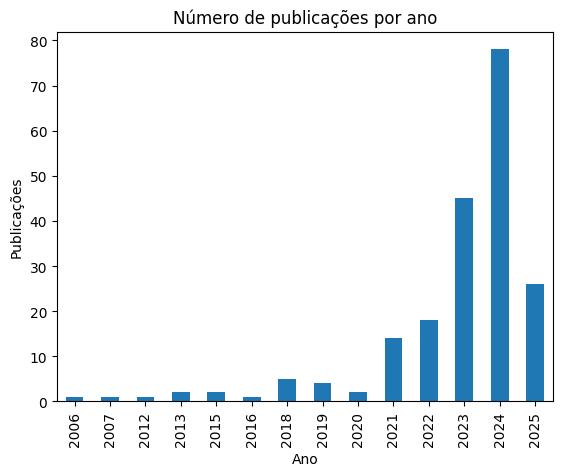

In [32]:
df['year'] = pd.to_numeric(df['year'], errors='coerce')
publicacoes_por_ano = df['year'].value_counts().sort_index()

publicacoes_por_ano.plot(kind='bar')
plt.title('Número de publicações por ano')
plt.xlabel('Ano')
plt.ylabel('Publicações')
plt.show()


### 2. Periódicos mais frequentes

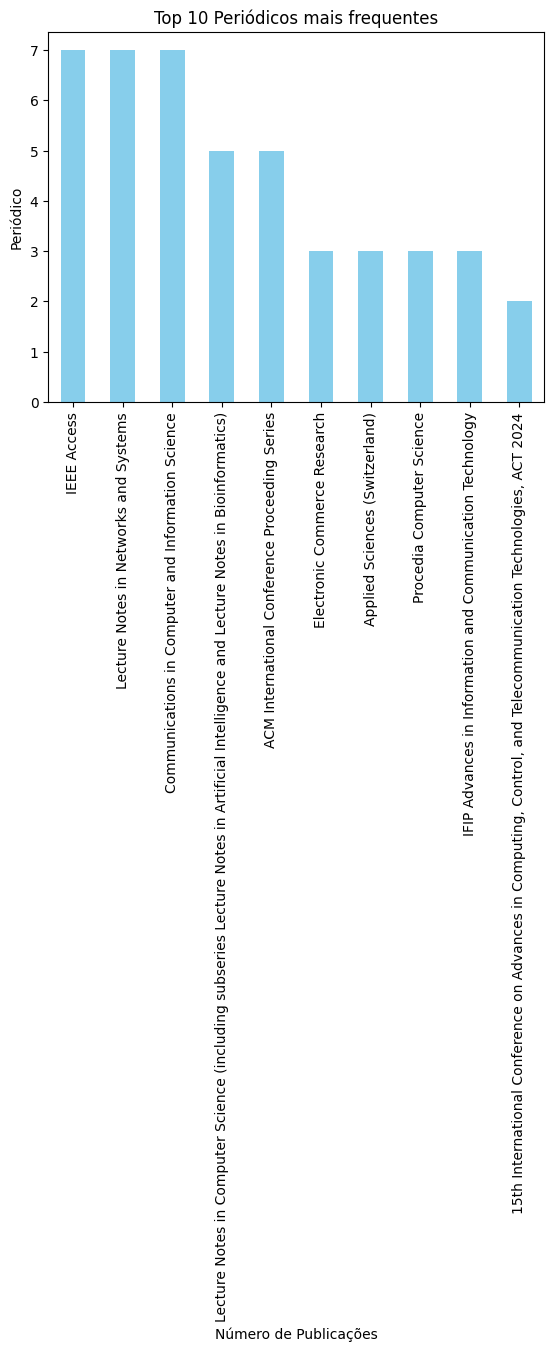

In [33]:
principais_journals = df['journal'].value_counts().head(10)

principais_journals.plot(kind='bar', color='skyblue')
plt.xlabel('Número de Publicações')
plt.ylabel('Periódico')
plt.title('Top 10 Periódicos mais frequentes')
plt.show()


### 3. Países mais frequentes

In [34]:
def extrair_pais(afiliacao):
    if pd.isna(afiliacao):
        return None
    partes = afiliacao.strip('{}').split(',')
    return partes[-1].strip()

df['pais'] = df['affiliations'].apply(extrair_pais)


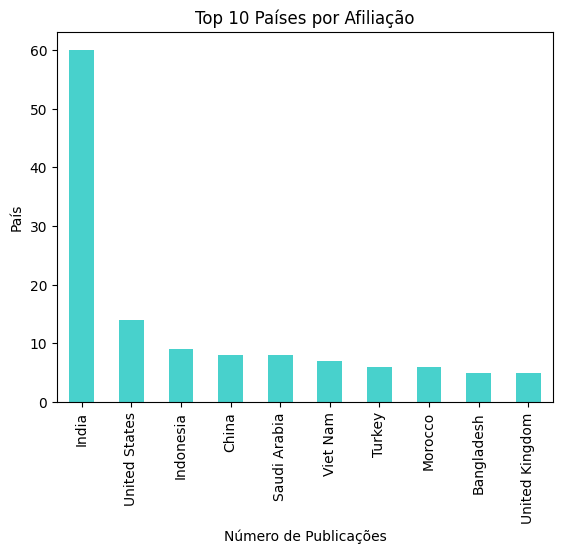

In [35]:
contagem_paises = df['pais'].value_counts().head(10)

contagem_paises.plot(kind='bar', color='mediumturquoise')
plt.xlabel('Número de Publicações')
plt.ylabel('País')
plt.title('Top 10 Países por Afiliação')
plt.show()


### 4. Nuvem de palavras

In [36]:
# Limpeza e contagem
palavras = []
for titulo in df['title'].dropna():
    palavras += re.findall(r'\b\w{4,}\b', titulo.lower())

contagem = Counter(palavras).most_common(10)
print(contagem)


[('analysis', 113), ('sentiment', 101), ('using', 69), ('customer', 59), ('learning', 58), ('based', 56), ('classification', 41), ('reviews', 36), ('text', 32), ('bert', 29)]


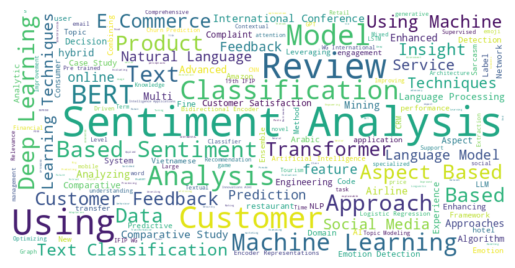

In [37]:
texto = ' '.join(df['title'].dropna().tolist())
nuvem = WordCloud(width=800, height=400, background_color='white').generate(texto)

plt.imshow(nuvem, interpolation='bilinear')
plt.axis('off')
plt.show()


### 5. Correlação de keywords utilizando o software VOSviewer

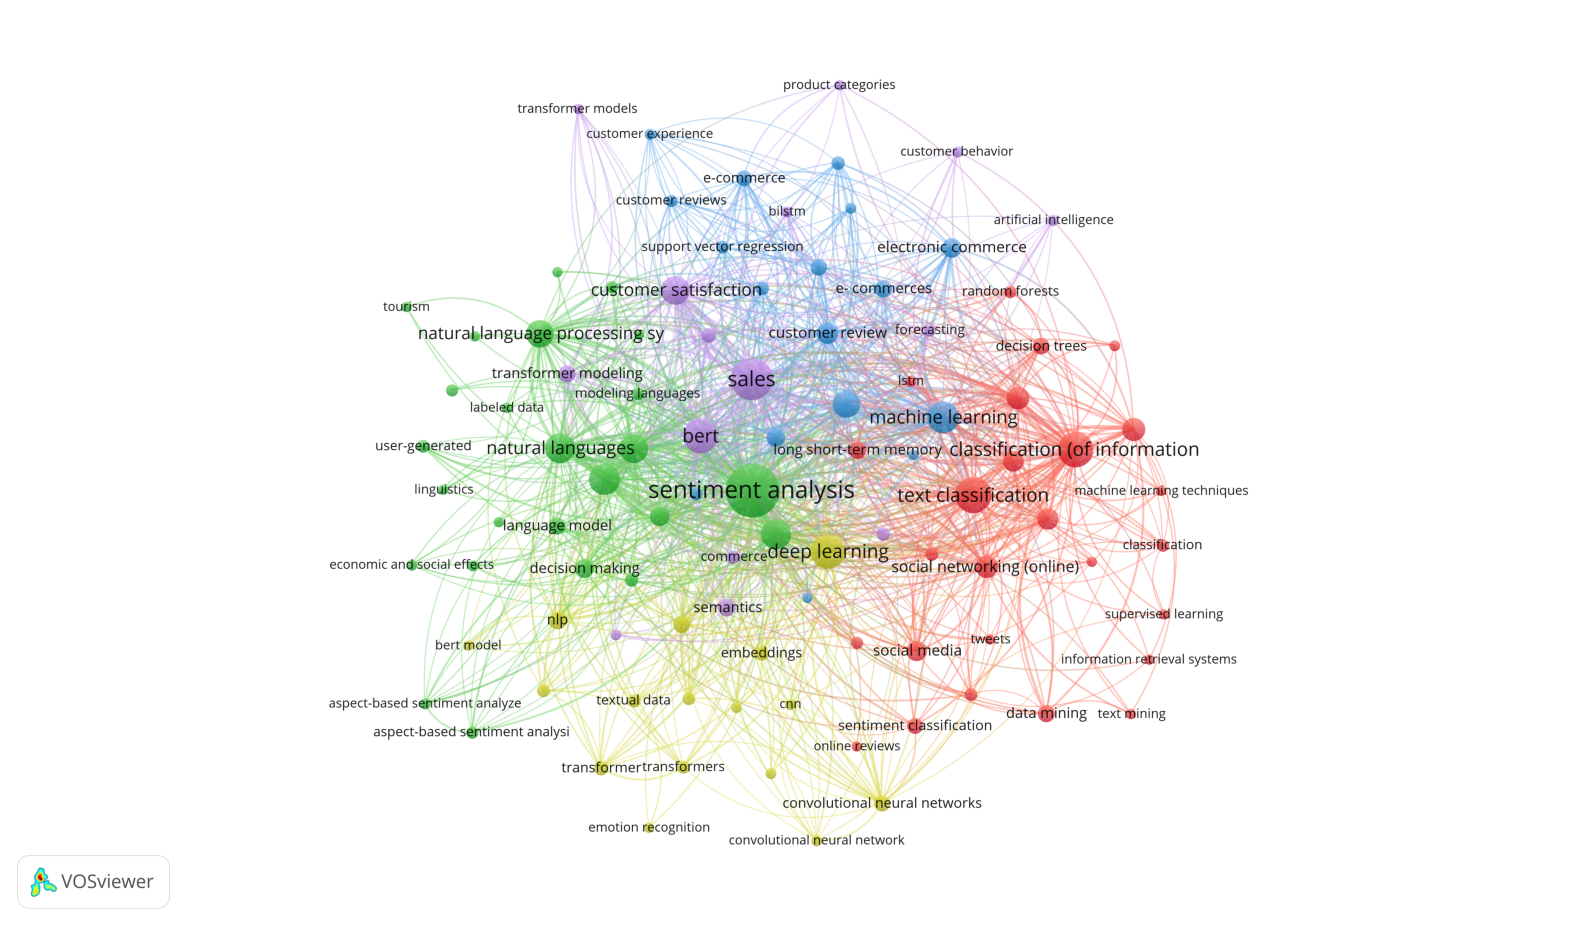

In [38]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Carregar a imagem
img = mpimg.imread('../data/text-customer.png')

plt.figure(figsize=(20, 16))

# Exibir a imagem
plt.imshow(img)
plt.axis('off')
plt.show()

Para:

$$
\text{text mining} \cap \text{survival analysis}
$$

Foram encontrados 61 documentos no banco de dados fornecido pelo **Scopus**, a partir da seguinte estratégia de busca:
>( "BERT" OR "pretrained language models" OR "text embeddings" OR "text classification" ) AND ( "survival analysis" OR "reliability analysis" )

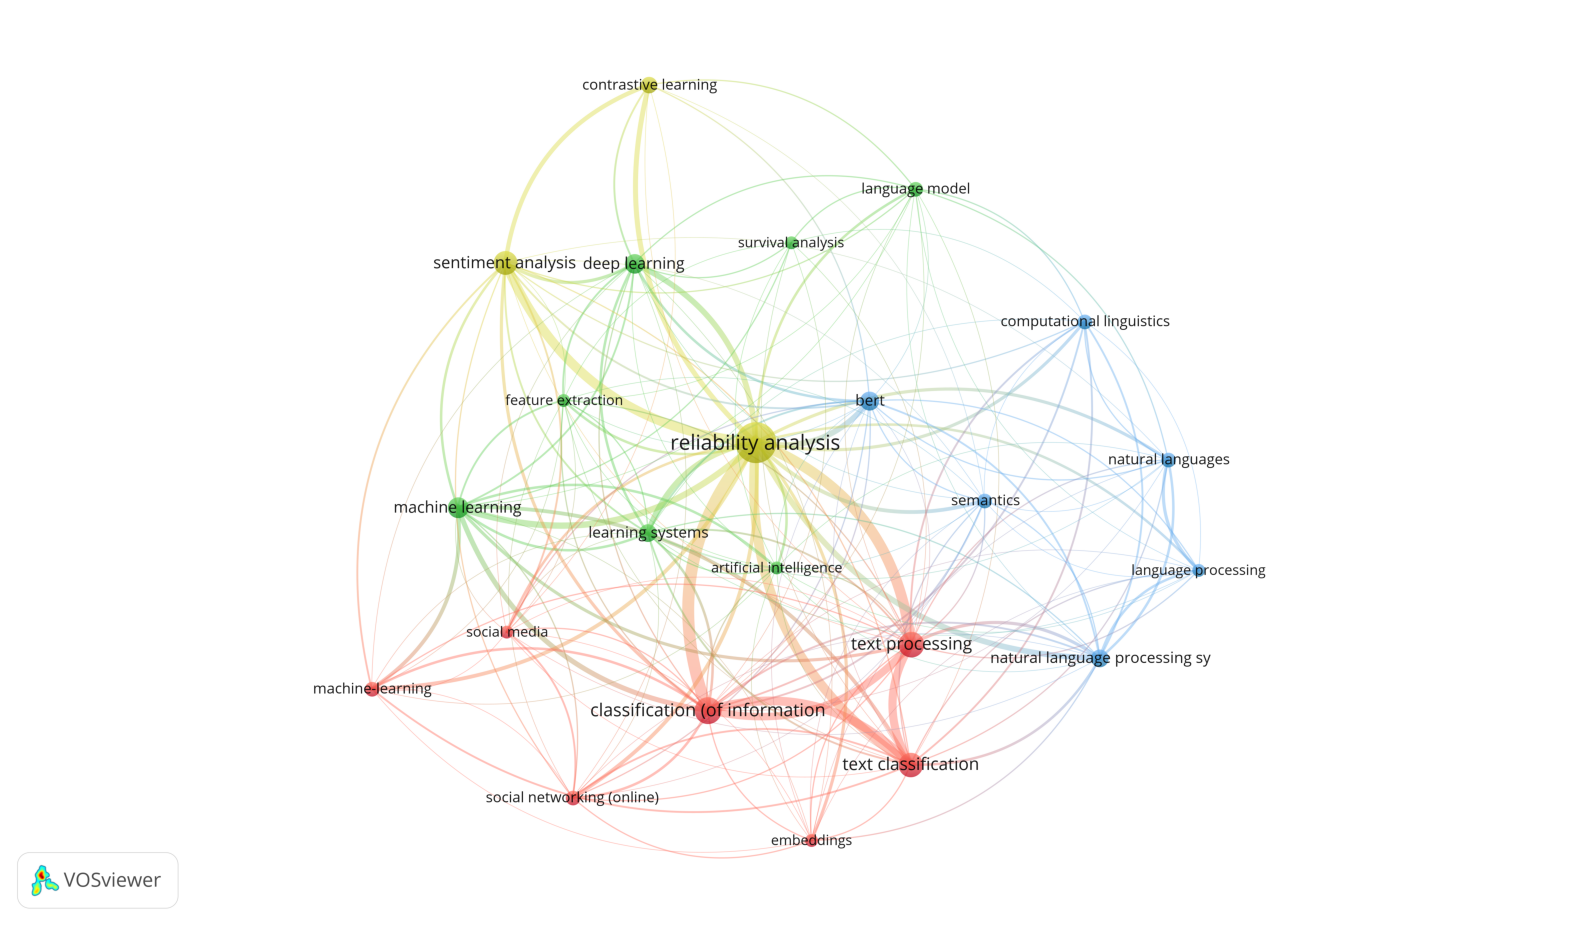

In [39]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Carregar a imagem
img = mpimg.imread('../data/survival-text.png')

plt.figure(figsize=(20, 16))

# Exibir a imagem
plt.imshow(img)
plt.axis('off')
plt.show()

Para:

$$
\text{customer behavior} \cap \text{survival analysis}
$$

Foram encontrados 104 documentos no banco de dados fornecido pelo **Scopus**, a partir da seguinte estratégia de busca:
> ( "survival analysis" OR "reliability analysis" ) AND ( "customer behavior" OR "customer feedback" OR "customer sentiment" OR "churn prediction" OR "customer engagement" OR "customer retention" )

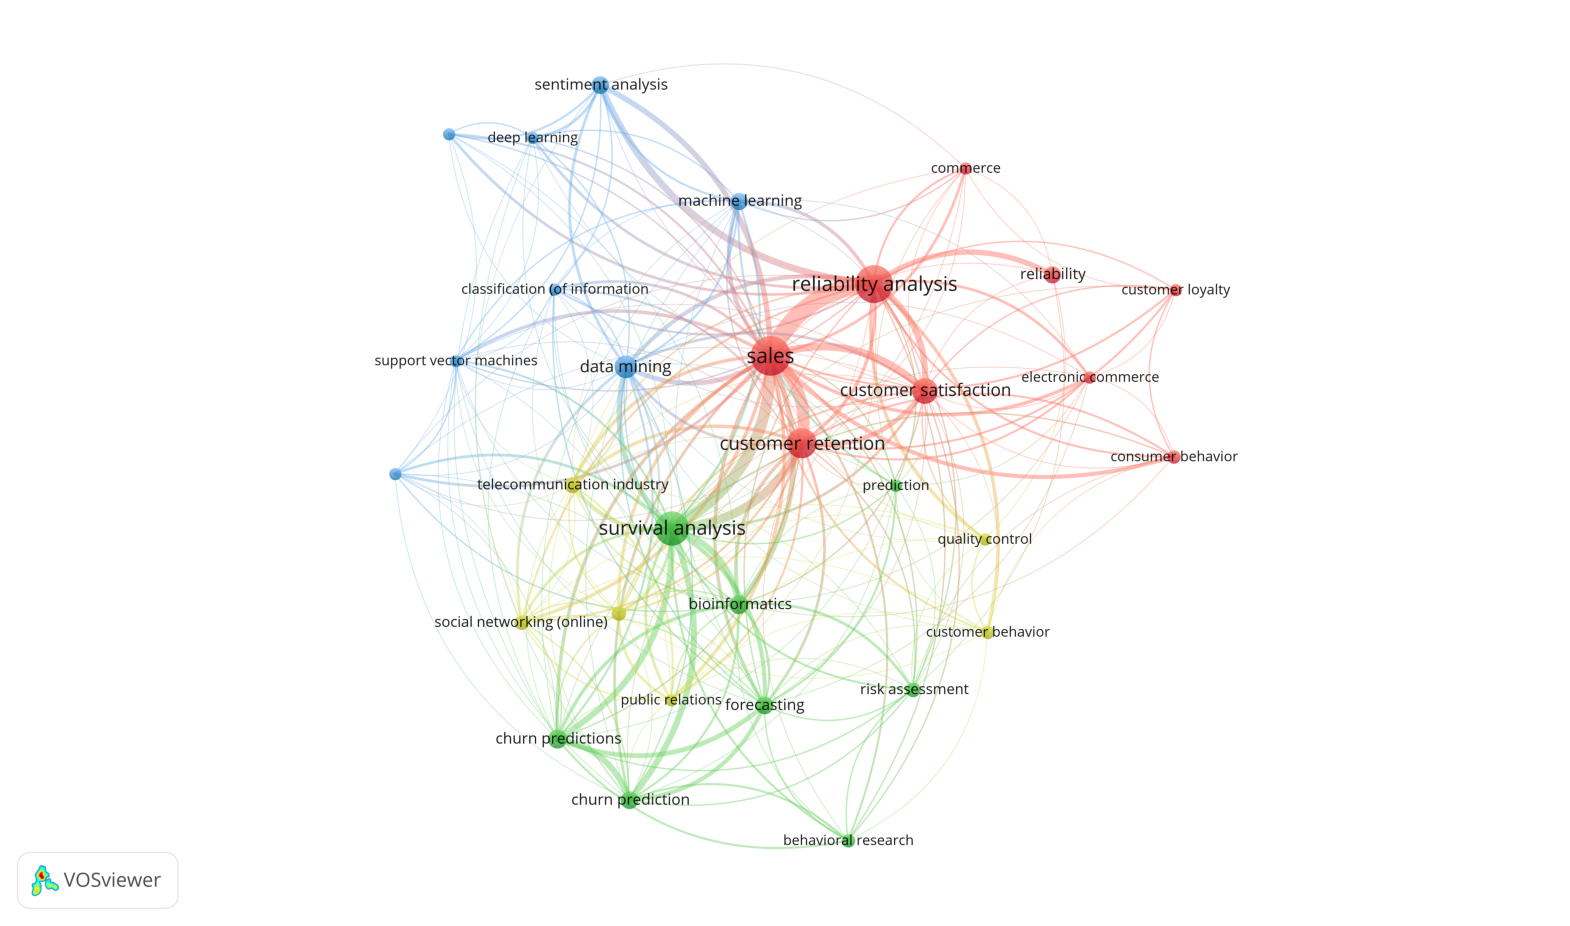

In [40]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Carregar a imagem
img = mpimg.imread('../data/survival-customer.png')

plt.figure(figsize=(20, 16))

# Exibir a imagem
plt.imshow(img)
plt.axis('off')
plt.show()